In [85]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Ignore warnings

In [86]:
df = pd.read_csv('C:\\Users\\91833\\end to end projects\\dibetes prediction\\data\\heart disease.csv')

In [87]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [88]:
df = df.rename(columns={
                'age':'Age',
                'gender':'Sex',
                'height':'Height',
                'weight':'Weight',
               'ap_hi': 'Systolic_BP',
               'ap_lo': 'Diastolic_BP',
               'cholesterol': 'Cholesterol_Level',
               'gluc': 'Glucose_Level',
               'smoke': 'Smoking_Status',
               'alco': 'Alcohol_Intake',
               'active': 'Physical_Activity',
               'cardio': 'target'
})

In [89]:
df.head()

,id,Age,Sex,Height,Weight,Systolic_BP,Diastolic_BP,Cholesterol_Level,Glucose_Level,Smoking_Status,Alcohol_Intake,Physical_Activity,target
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   Age                70000 non-null  int64  
 2   Sex                70000 non-null  int64  
 3   Height             70000 non-null  int64  
 4   Weight             70000 non-null  float64
 5   Systolic_BP        70000 non-null  int64  
 6   Diastolic_BP       70000 non-null  int64  
 7   Cholesterol_Level  70000 non-null  int64  
 8   Glucose_Level      70000 non-null  int64  
 9   Smoking_Status     70000 non-null  int64  
 10  Alcohol_Intake     70000 non-null  int64  
 11  Physical_Activity  70000 non-null  int64  
 12  target             70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [91]:
df.shape

(70000, 13)

In [92]:
df.isnull().sum()

id                   0
Age                  0
Sex                  0
Height               0
Weight               0
Systolic_BP          0
Diastolic_BP         0
Cholesterol_Level    0
Glucose_Level        0
Smoking_Status       0
Alcohol_Intake       0
Physical_Activity    0
target               0
dtype: int64

In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
df.describe()

,id,Age,Sex,Height,Weight,Systolic_BP,Diastolic_BP,Cholesterol_Level,Glucose_Level,Smoking_Status,Alcohol_Intake,Physical_Activity,target
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Data validation and Pre-processing

In [95]:
# convert age to years
df['Age_Years']= round(df['Age']/365,0)
df.drop('Age', axis=1, inplace=True)

In [96]:
# convert height to meters
df['Height_mt'] = df['Height']/100
df.drop('Height', axis=1, inplace=True)

In [97]:
#Apply cleaning rules ---
df= df[
    (df['Systolic_BP'] >= 90) & (df['Systolic_BP'] <= 250) &   # valid systolic range
    (df['Diastolic_BP'] >= 60) & (df['Diastolic_BP'] <= 150) & # valid diastolic range
    (df['Diastolic_BP'] <= df['Systolic_BP'])                  # logical condition
]

In [98]:
df['BMI'] = df['Weight'] / (df['Height_mt'] ** 2)

In [99]:
df.describe()

,id,Sex,Weight,Systolic_BP,Diastolic_BP,Cholesterol_Level,Glucose_Level,Smoking_Status,Alcohol_Intake,Physical_Activity,target,Age_Years,Height_mt,BMI
count,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000,68494.000000
mean,49976.565612,1.348936,74.143307,126.737451,81.370076,1.364733,1.225815,0.087906,0.053348,0.803472,0.495182,53.331737,1.643695,27.528592
std,28845.468279,0.476637,14.324803,16.599577,9.331586,0.679088,0.571802,0.283159,0.224728,0.397375,0.499980,6.765793,0.081823,6.052877
min,0.000000,1.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.550000,3.471784
25%,25007.250000,1.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,1.590000,23.875115
50%,50009.500000,1.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,1.650000,26.346494
75%,74873.750000,2.000000,82.000000,140.000000,90.000000,1.750000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,1.700000,30.119376
max,99999.000000,2.000000,200.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,2.500000,298.666667


In [100]:
# checking for wrong entries
df.sort_values(by='BMI', ascending=False).head(10)[['BMI', 'Age_Years','Height_mt']].reset_index(drop=True)

,BMI,Age_Years,Height_mt
0,298.666667,54.0,0.75
1,278.125000,42.0,0.80
2,267.768595,64.0,0.55
3,237.768633,52.0,0.81
4,191.666667,52.0,0.60
5,187.750077,52.0,0.57
6,180.678074,48.0,0.97
7,178.962747,54.0,0.74
8,178.213411,56.0,0.67
9,170.414201,54.0,0.65


In [101]:
# --- Define realistic ranges ---
BMI_MIN, BMI_MAX = 15, 60
HEIGHT_MIN, HEIGHT_MAX = 1.3, 2.1

# --- Store initial row count ---
initial_rows = len(df)

# --- Filter dataframe based on Height and BMI ---
df = df[
    (df['Height_mt'] >= HEIGHT_MIN) &
    (df['Height_mt'] <= HEIGHT_MAX)
].copy()

# --- Recalculate BMI after height filtering ---
df['BMI'] = df['Weight'] / (df['Height_mt'] ** 2)

# --- Filter based on BMI ---
df = df[(df['BMI'] >= BMI_MIN) & (df['BMI'] <= BMI_MAX)]

### Bssic feature engineering

In [102]:
def classify_bp(row):
    if row['Systolic_BP'] < 120 and row['Diastolic_BP'] < 80:
        return 1
    elif 120 <= row['Systolic_BP'] <= 129 and row['Diastolic_BP'] < 80:
        return 2
    elif (130 <= row['Systolic_BP'] <= 139) or (80 <= row['Diastolic_BP'] <= 89):
        return 3
    elif (140 <= row['Systolic_BP'] <= 180) or (90 <= row['Diastolic_BP'] <= 120):
        return 4
    elif row['Systolic_BP'] > 180 or row['Diastolic_BP'] > 120:
        return 5
    else:
        return 'Unknown'

df['BP_level'] = df.apply(classify_bp, axis=1)
df['BP_level'].value_counts()

BP_level
3    39693
4    16146
1     9392
2     3093
5       37
Name: count, dtype: int64

In [103]:
# Define bins and labels
age_bins = [29, 40, 50, 60, 70]  # based on descriptive stats min 30 and max 65
age_labels = ['30-40', '41-50', '51-60', '61-70']

df['Age_Group'] = pd.cut(df['Age_Years'], bins=age_bins, labels=age_labels, right=True)
print("\nAge Group counts:\n",df['Age_Group'].value_counts())


Age Group counts:
 Age_Group
51-60    34695
41-50    20444
61-70    10173
30-40     3049
Name: count, dtype: int64


In [104]:
# Class BMI Categories
bmi_bins_5 = [0, 18.5, 25, 30, 35, np.inf]
bmi_labels_5 = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II+']

df['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins_5, labels=bmi_labels_5, right=False)

# Check counts for each category
print(df['BMI_Category'].value_counts())

BMI_Category
Normal         25337
Overweight     24566
Obese I        11925
Obese II+       5929
Underweight      604
Name: count, dtype: int64


In [105]:
df.columns

Index(['id', 'Sex', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol_Level', 'Glucose_Level', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity', 'target', 'Age_Years', 'Height_mt', 'BMI', 'BP_level', 'Age_Group', 'BMI_Category'], dtype='object')

In [106]:
# Check missing % per column
missing_pct = df.isna().mean() * 100
print("Missing % per column:\n", missing_pct)

Missing % per column:
 id                   0.0
Sex                  0.0
Weight               0.0
Systolic_BP          0.0
Diastolic_BP         0.0
Cholesterol_Level    0.0
Glucose_Level        0.0
Smoking_Status       0.0
Alcohol_Intake       0.0
Physical_Activity    0.0
target               0.0
Age_Years            0.0
Height_mt            0.0
BMI                  0.0
BP_level             0.0
Age_Group            0.0
BMI_Category         0.0
dtype: float64


# EDA

In [107]:
# Heart disease prevalence
print("Heart disease prevalence:")
print(df['target'].value_counts(normalize=True) * 100)

Heart disease prevalence:
target
0    50.479074
1    49.520926
Name: proportion, dtype: float64


### univariate analysis

In [108]:
df.columns

Index(['id', 'Sex', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol_Level', 'Glucose_Level', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity', 'target', 'Age_Years', 'Height_mt', 'BMI', 'BP_level', 'Age_Group', 'BMI_Category'], dtype='object')

### numerical analysis

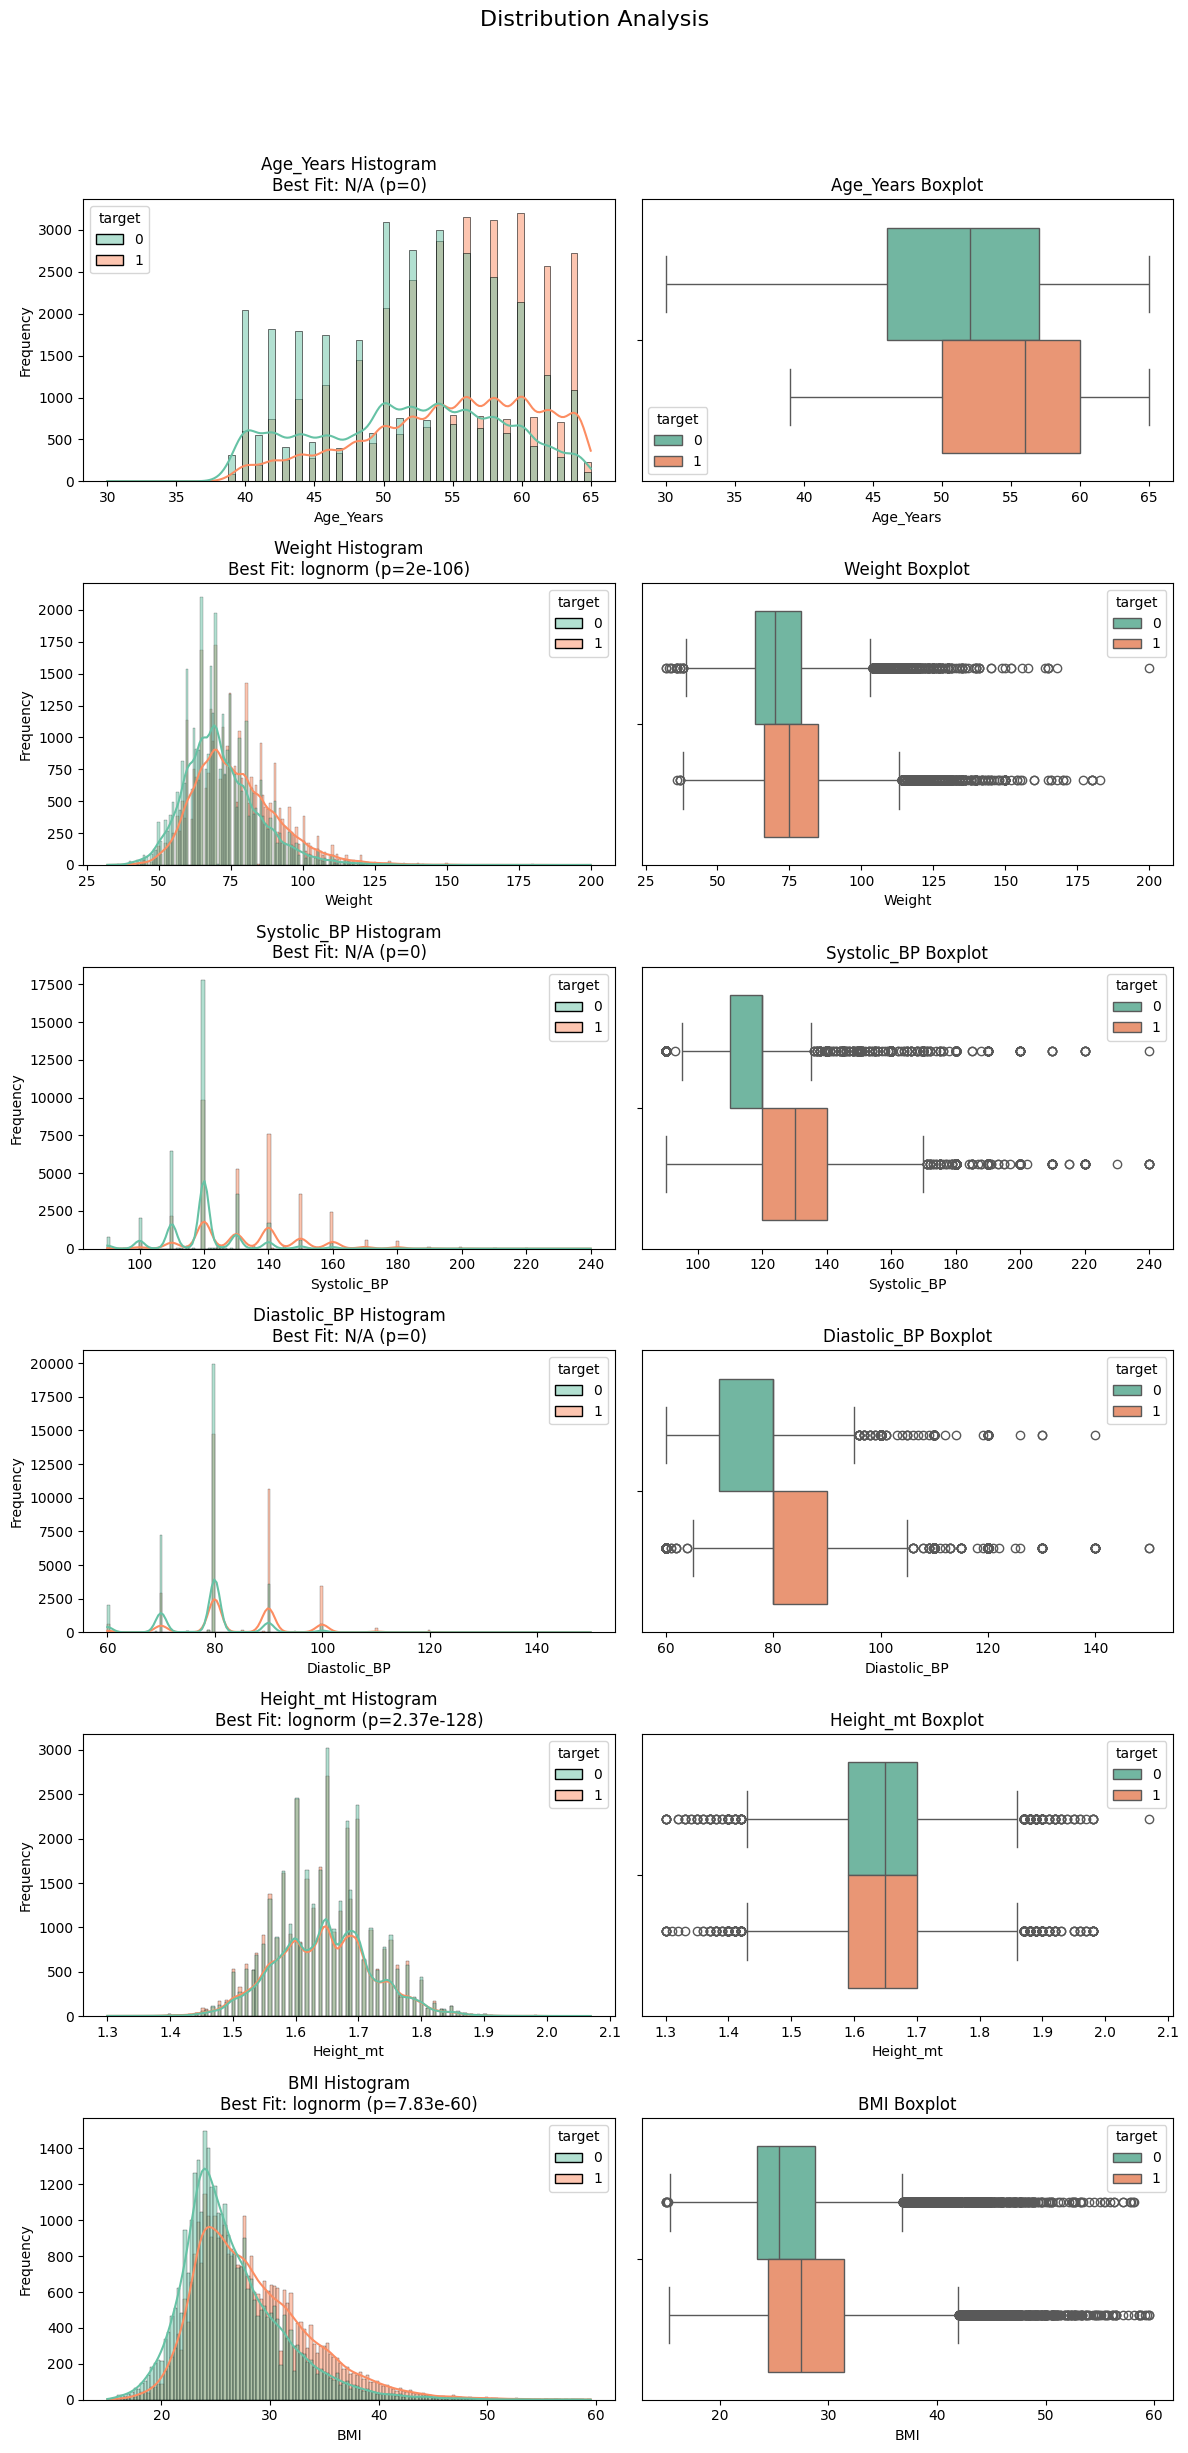

In [109]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = ['Age_Years', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Height_mt', 'BMI']
distributions = ['norm', 'expon', 'uniform', 'gamma', 'lognorm']

n_rows = len(numeric_cols)
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows), squeeze=False)
fig.suptitle('Distribution Analysis', fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols):
    # Prepare DataFrame with target for hue
    data_col = df[[col, 'target']].dropna()
    if len(data_col) < 10:
        continue

    # Best-fit distribution (ignoring target for fitting)
    best_fit_name, best_p_value = 'N/A', 0
    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        try:
            params = dist.fit(data_col[col])
            _, p_value = stats.kstest(data_col[col], dist_name, args=params)
            if p_value > best_p_value:
                best_fit_name, best_p_value = dist_name, p_value
        except ValueError:
            continue

    # Histogram + KDE
    sns.histplot(data=data_col, x=col, kde=True, ax=axes[i, 0], hue='target', palette='Set2')
    axes[i, 0].set_title(f'{col} Histogram\nBest Fit: {best_fit_name} (p={best_p_value:.3g})')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(data=data_col, x=col, y=None, ax=axes[i, 1], hue='target', palette='Set2')
    axes[i, 1].set_title(f'{col} Boxplot')
    axes[i, 1].set_xlabel(col)

plt.tight_layout(rect=(0, 0, 1, 0.98))
plt.show()

C:\Users\91833\AppData\Local\Temp\ipykernel_17444\1604544413.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('target', group_keys=False).apply(


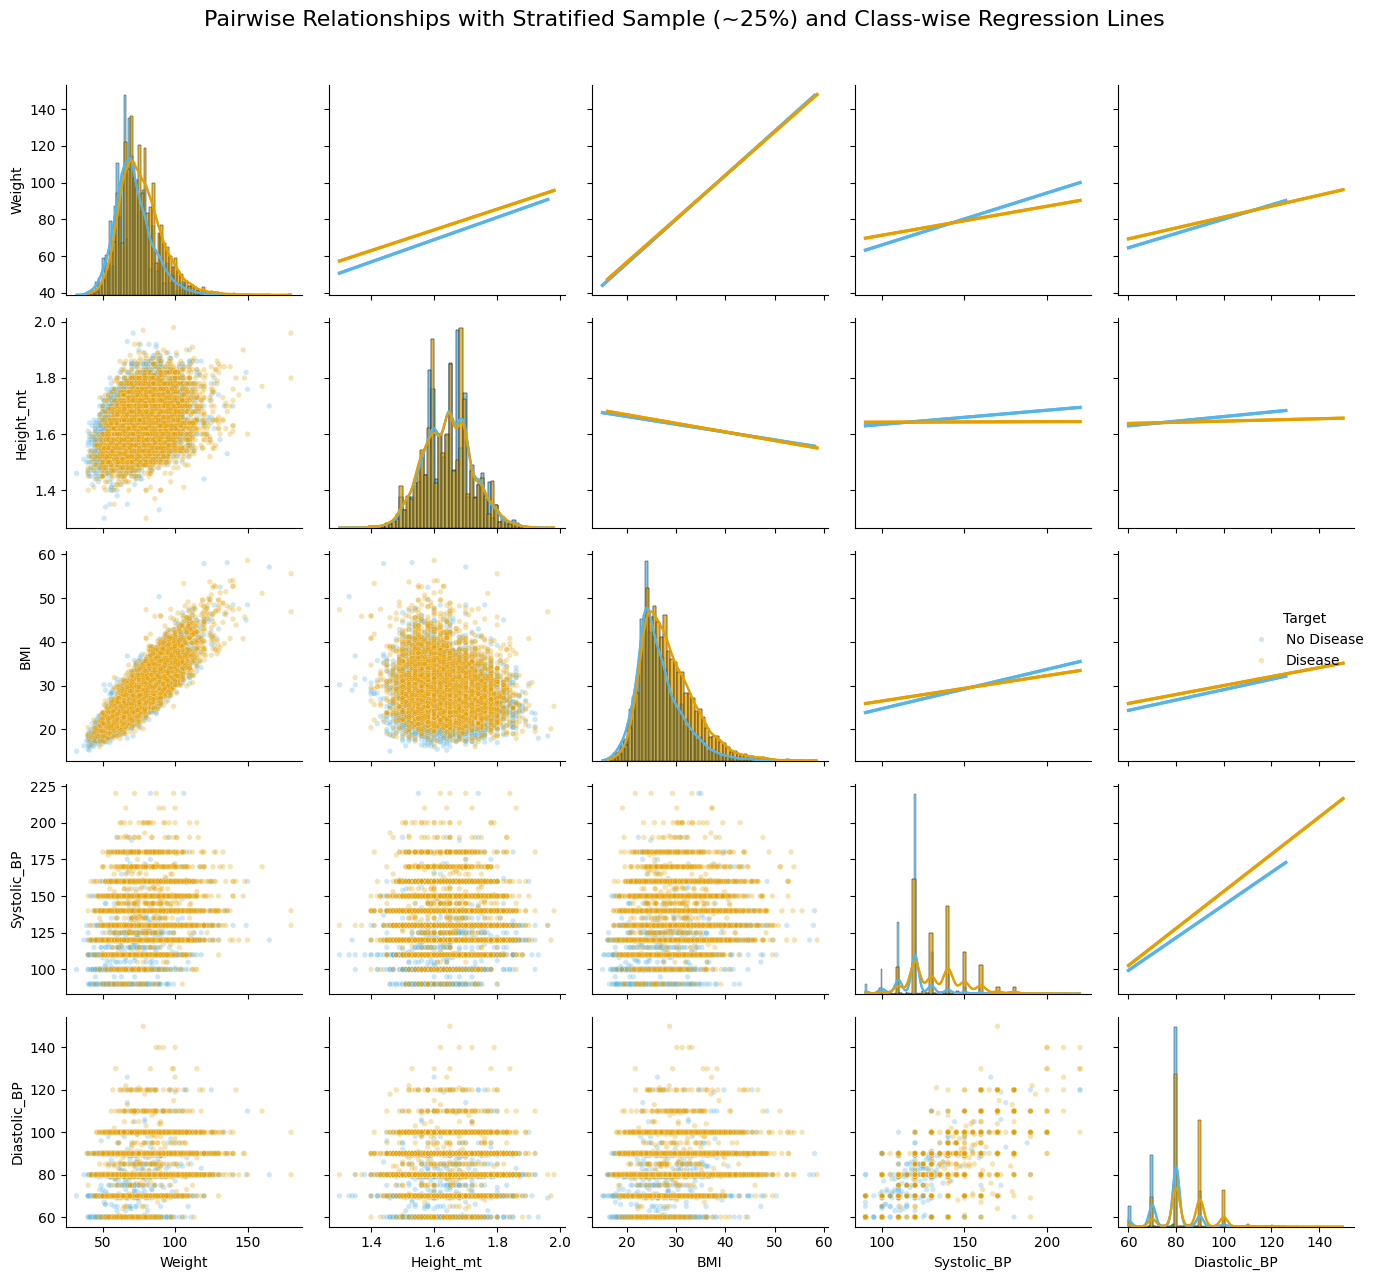

In [110]:
# -----------------------------
# 1. Numeric features & target
# -----------------------------
numeric_cols = ['Weight','Height_mt','BMI','Systolic_BP', 'Diastolic_BP']
df['target_name'] = df['target'].map({0: 'No Disease', 1: 'Disease'})

# -----------------------------
# 2. Stratified sample (~25% of data, 15k rows)
# -----------------------------
sample_size = 15000
if len(df) > sample_size:
    df_sample = df.groupby('target', group_keys=False).apply(
        lambda x: x.sample(n=int(sample_size/2), random_state=42)  # equal split per target
    ).reset_index(drop=True)
else:
    df_sample = df.copy()

# -----------------------------
# 3. Palette for light/high-contrast colors
# -----------------------------
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

# -----------------------------
# 4. PairGrid
# -----------------------------
g = sns.PairGrid(df_sample, vars=numeric_cols, hue='target_name', palette=palette, diag_sharey=False)

# Upper triangle: regression lines per target
def reg_by_target(x, y, **kwargs):
    for name, color in palette.items():
        subset = df_sample[df_sample['target_name'] == name]
        sns.regplot(x=subset[x.name], y=subset[y.name], scatter=False, ci=None,
                    line_kws={'color': color, 'label': name})

g.map_upper(reg_by_target)

# Lower triangle: scatterplots
g.map_lower(sns.scatterplot, alpha=0.3, s=15)

# Diagonal: histograms/KDE per target
def hist_diag(x, **kwargs):
    for name, color in palette.items():
        subset = df_sample[df_sample['target_name'] == name]
        sns.histplot(subset[x.name], color=color, alpha=0.5, kde=True, label=name)

g.map_diag(hist_diag)

# Add legend
g.add_legend(title='Target')

# Set axis labels
for i, var in enumerate(numeric_cols):
    g.axes[i,0].set_ylabel(var)
    g.axes[-1,i].set_xlabel(var)

plt.suptitle('Pairwise Relationships with Stratified Sample (~25%) and Class-wise Regression Lines', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

df=df.drop('target_name', axis=1)

1. weight vs all variables
    - direct -> BP , BMI , height

2. height vs all variables
    - direct -> BP,  weight, BMI

3. BMI vs all variables
    - direct -> BP , weight 
    - indirect / mixed -> height (slight protective)

4. systolic__BP vs all variables
    - direct -> diastolic__BP , weight
    - mixed (no effect / slight protective)-> height ,BMI
 
5. diastolic__BP vs all variables
    - direct -> systolic__BP , BMI , weight
    - mixed (no effect / slight protective )-> height 

direct -bp (5), bmi (3), height (1), weight (4),     
mixed - bmi (1) , height (3)

conclusion :- a patient with high bmi , high bp and more weight have more chances of developing heart disease and   
             height is less dominating if these factors are considered  

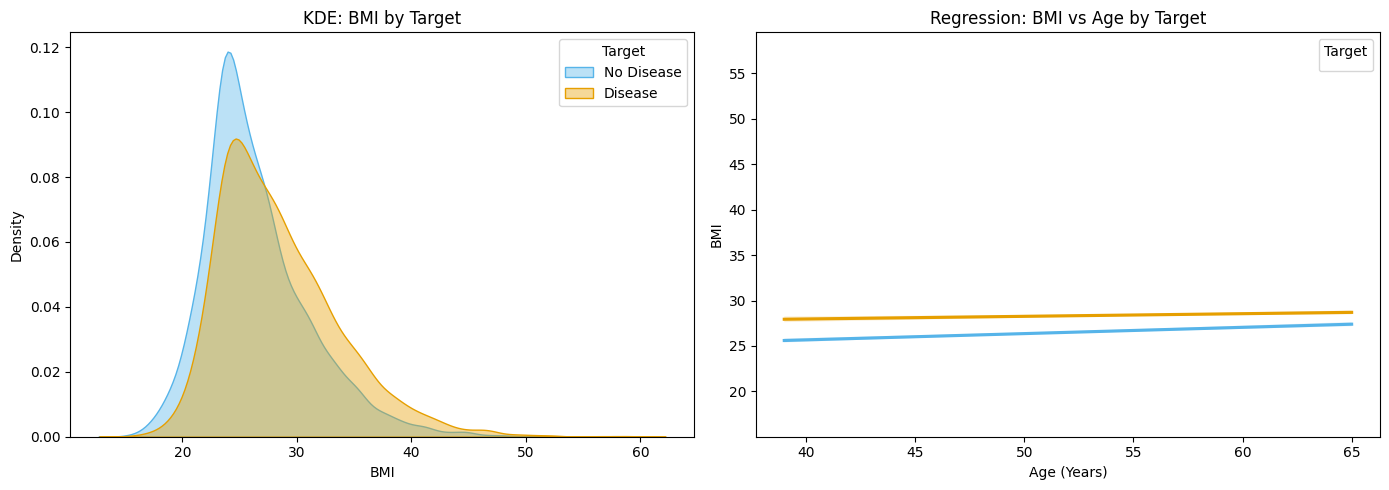

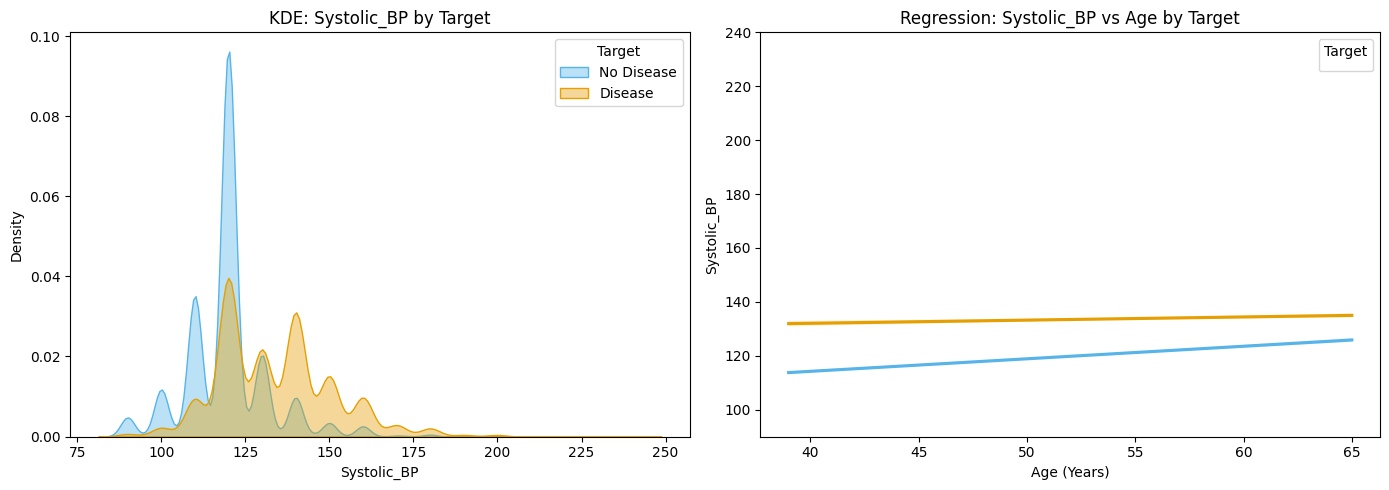

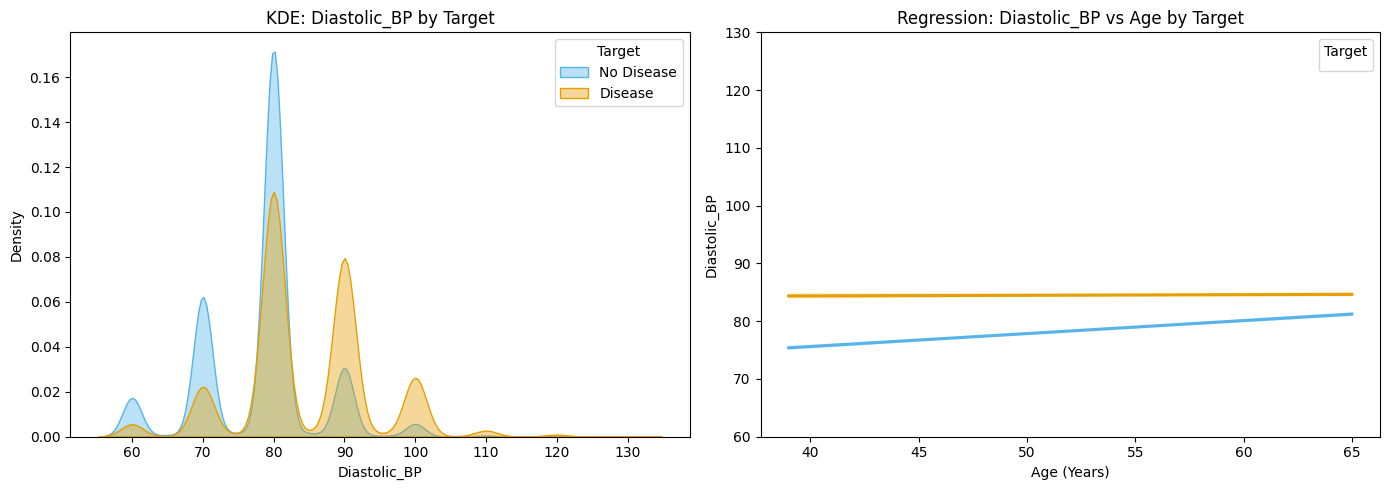

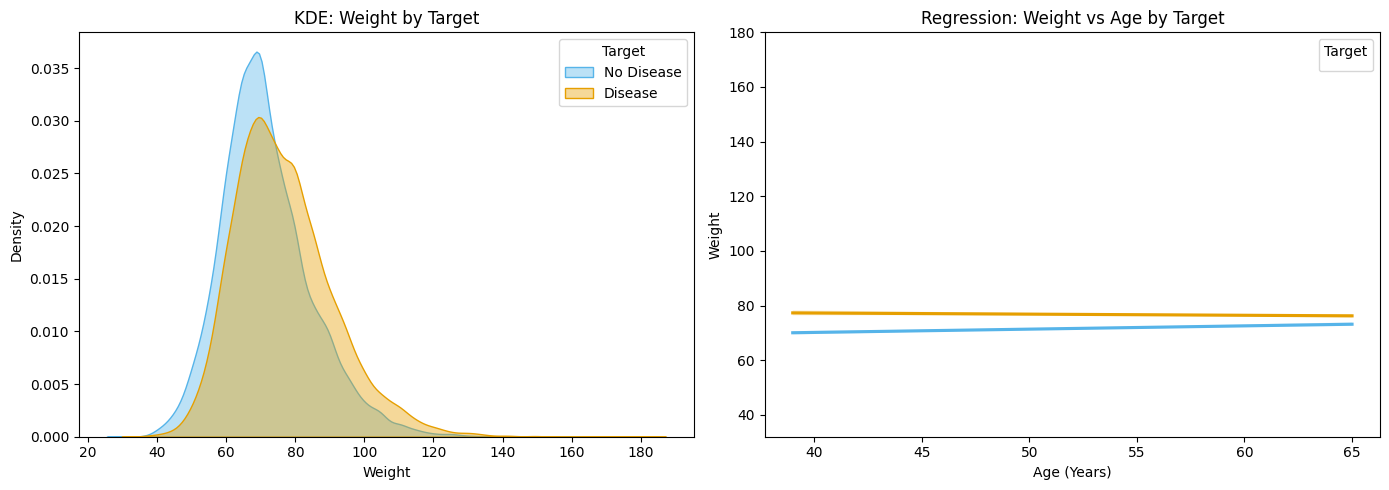

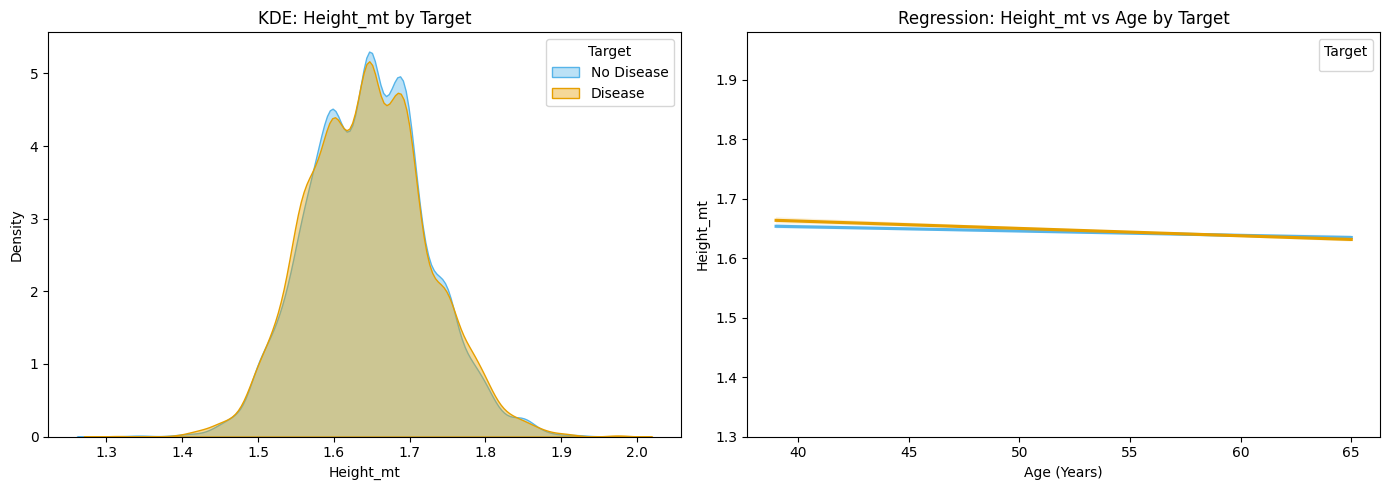

In [111]:
from sklearn.model_selection import train_test_split

# Define features
features = ['BMI', 'Systolic_BP', 'Diastolic_BP', 'Weight', 'Height_mt']

# Map target to names
df['target_name'] = df['target'].map({0:'No Disease', 1:'Disease'})
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

# --- Stratified sampling (~25% of dataset, max 15000 rows) ---
strata_size = min(15000, len(df))
df_sample, _ = train_test_split(
    df,
    train_size=strata_size,
    stratify=df['target'],
    random_state=42
)

# Plot KDE + Regression per feature
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Determine full y-range of the feature to match KDE and regression plots
    y_min = df_sample[feature].min()
    y_max = df_sample[feature].max()

    # --- Left: KDE of the feature per target (1D) ---
    for t_name, color in palette.items():
        sns.kdeplot(
            data=df_sample[df_sample['target_name']==t_name],
            x=feature,
            fill=True,
            alpha=0.4,
            color=color,
            label=t_name,
            common_norm=False,
            ax=axes[0]
        )
    axes[0].set_title(f"KDE: {feature} by Target")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend(title='Target')

    # --- Right: Regression of feature vs Age per target ---
    for t_name, color in palette.items():
        subset = df_sample[df_sample['target_name']==t_name]
        sns.regplot(
            data=subset,
            x='Age_Years',
            y=feature,
            scatter=False,
            line_kws={'color': color, 'label': t_name},
            ax=axes[1]
        )
    axes[1].set_title(f"Regression: {feature} vs Age by Target")
    axes[1].set_xlabel("Age (Years)")
    axes[1].set_ylabel(feature)
    axes[1].set_ylim(y_min, y_max)  # fix y-axis to match KDE
    axes[1].legend(title='Target')

    plt.tight_layout()
    plt.show()

conclusion:-
- In the diseased population, factors like high BMI and high weight are consistently present regardless of age. In the non-diseased population, these same risk factors (BMI, weight, BP) tend to increase as age increases

In [112]:
# Check missing % per column
missing_pct = df.isna().mean() * 100
print("Missing % per column:\n", missing_pct)

Missing % per column:
 id                   0.0
Sex                  0.0
Weight               0.0
Systolic_BP          0.0
Diastolic_BP         0.0
Cholesterol_Level    0.0
Glucose_Level        0.0
Smoking_Status       0.0
Alcohol_Intake       0.0
Physical_Activity    0.0
target               0.0
Age_Years            0.0
Height_mt            0.0
BMI                  0.0
BP_level             0.0
Age_Group            0.0
BMI_Category         0.0
target_name          0.0
dtype: float64


### categorical analysis

In [113]:
df.columns

Index(['id', 'Sex', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol_Level', 'Glucose_Level', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity', 'target', 'Age_Years', 'Height_mt', 'BMI', 'BP_level', 'Age_Group', 'BMI_Category', 'target_name'], dtype='object')

In [114]:
cat_cols = ['Sex', 'BP_level', 'Age_Group', 'BMI_Category','Cholesterol_Level','Glucose_Level','Smoking_Status'
            ,'Alcohol_Intake','Physical_Activity']

In [115]:
# --- Logical Groups ---
groups = {
    'Demographics & Risk Factors': ['Sex', 'Age_Group', 'BMI_Category'],
    'Vitals & Biochemical': ['BP_level', 'Cholesterol_Level', 'Glucose_Level'],
    'Lifestyle Factors': ['Smoking_Status', 'Alcohol_Intake', 'Physical_Activity']
}

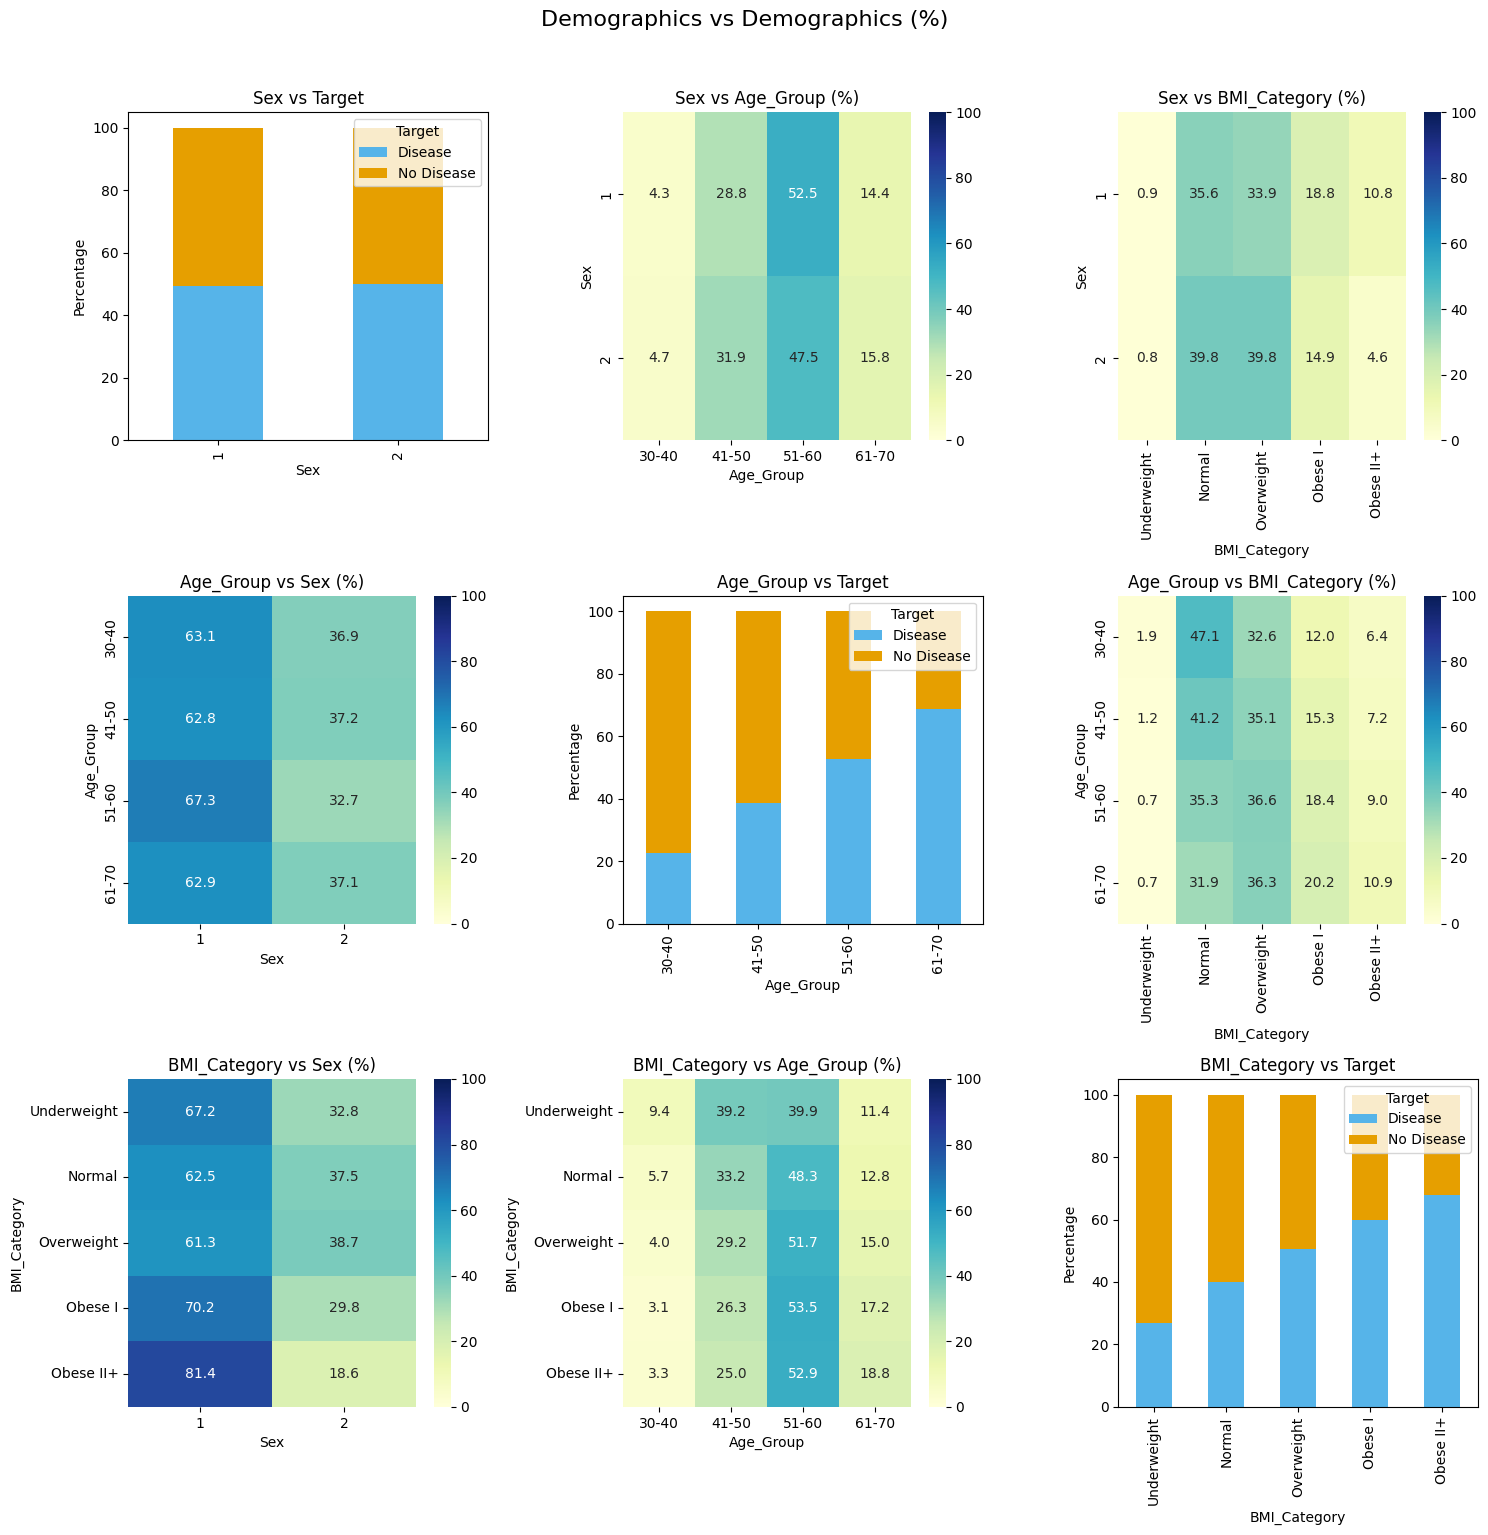

In [116]:
demo_cols = ['Sex', 'Age_Group', 'BMI_Category']
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

# Ensure target is mapped
df['target_name'] = df['target'].map({0:'No Disease', 1:'Disease'})

#  Demo column vs Demo column (%) as heatmaps ---
n = len(demo_cols)
fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))

for i, col1 in enumerate(demo_cols):
    for j, col2 in enumerate(demo_cols):
        ax = axes[i,j]
        if i==j:
            # Show target distribution as bar plot
            ct = pd.crosstab(df[col1], df['target_name'], normalize='index')*100
            ct.plot(kind='bar', stacked=True, color=[palette['No Disease'], palette['Disease']], ax=ax)
            ax.set_ylabel("Percentage")
            ax.set_xlabel(col1)
            ax.set_title(f"{col1} vs Target")
            ax.legend(title='Target')
        else:
            # Show normalized heatmap of col1 vs col2
            ct = pd.crosstab(df[col1], df[col2], normalize='index')*100
            sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax, vmin=0, vmax=100)
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)
            ax.set_title(f"{col1} vs {col2} (%)")
plt.suptitle("Demographics vs Demographics (%)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

df=df.drop('target_name',axis=1)

features are sex , age group , bmi 

-> sex vs rest
  - males are more weight than females (bmi) (twice of females but obese 2+ is 4 times of females)
  - males are more in number than females (age group) (twice of females)
  - equal in disease and no disease (no significant)

-> age group vs rest
 - as age increases bmi also increased
 - as age increase risk of developing disease also increases
 - more number males and females are in the age group 51-60 and next group is 41-50

-> bmi vs rest
 - as bmi increase risk of developing disease also increases
 - among different bmi catergories most males and females fall under the bmi range of normal to over weight and major age group is 30-50

In [117]:
# Check missing % per column
missing_pct = df.isna().mean() * 100
print("Missing % per column:\n", missing_pct)

Missing % per column:
 id                   0.0
Sex                  0.0
Weight               0.0
Systolic_BP          0.0
Diastolic_BP         0.0
Cholesterol_Level    0.0
Glucose_Level        0.0
Smoking_Status       0.0
Alcohol_Intake       0.0
Physical_Activity    0.0
target               0.0
Age_Years            0.0
Height_mt            0.0
BMI                  0.0
BP_level             0.0
Age_Group            0.0
BMI_Category         0.0
dtype: float64


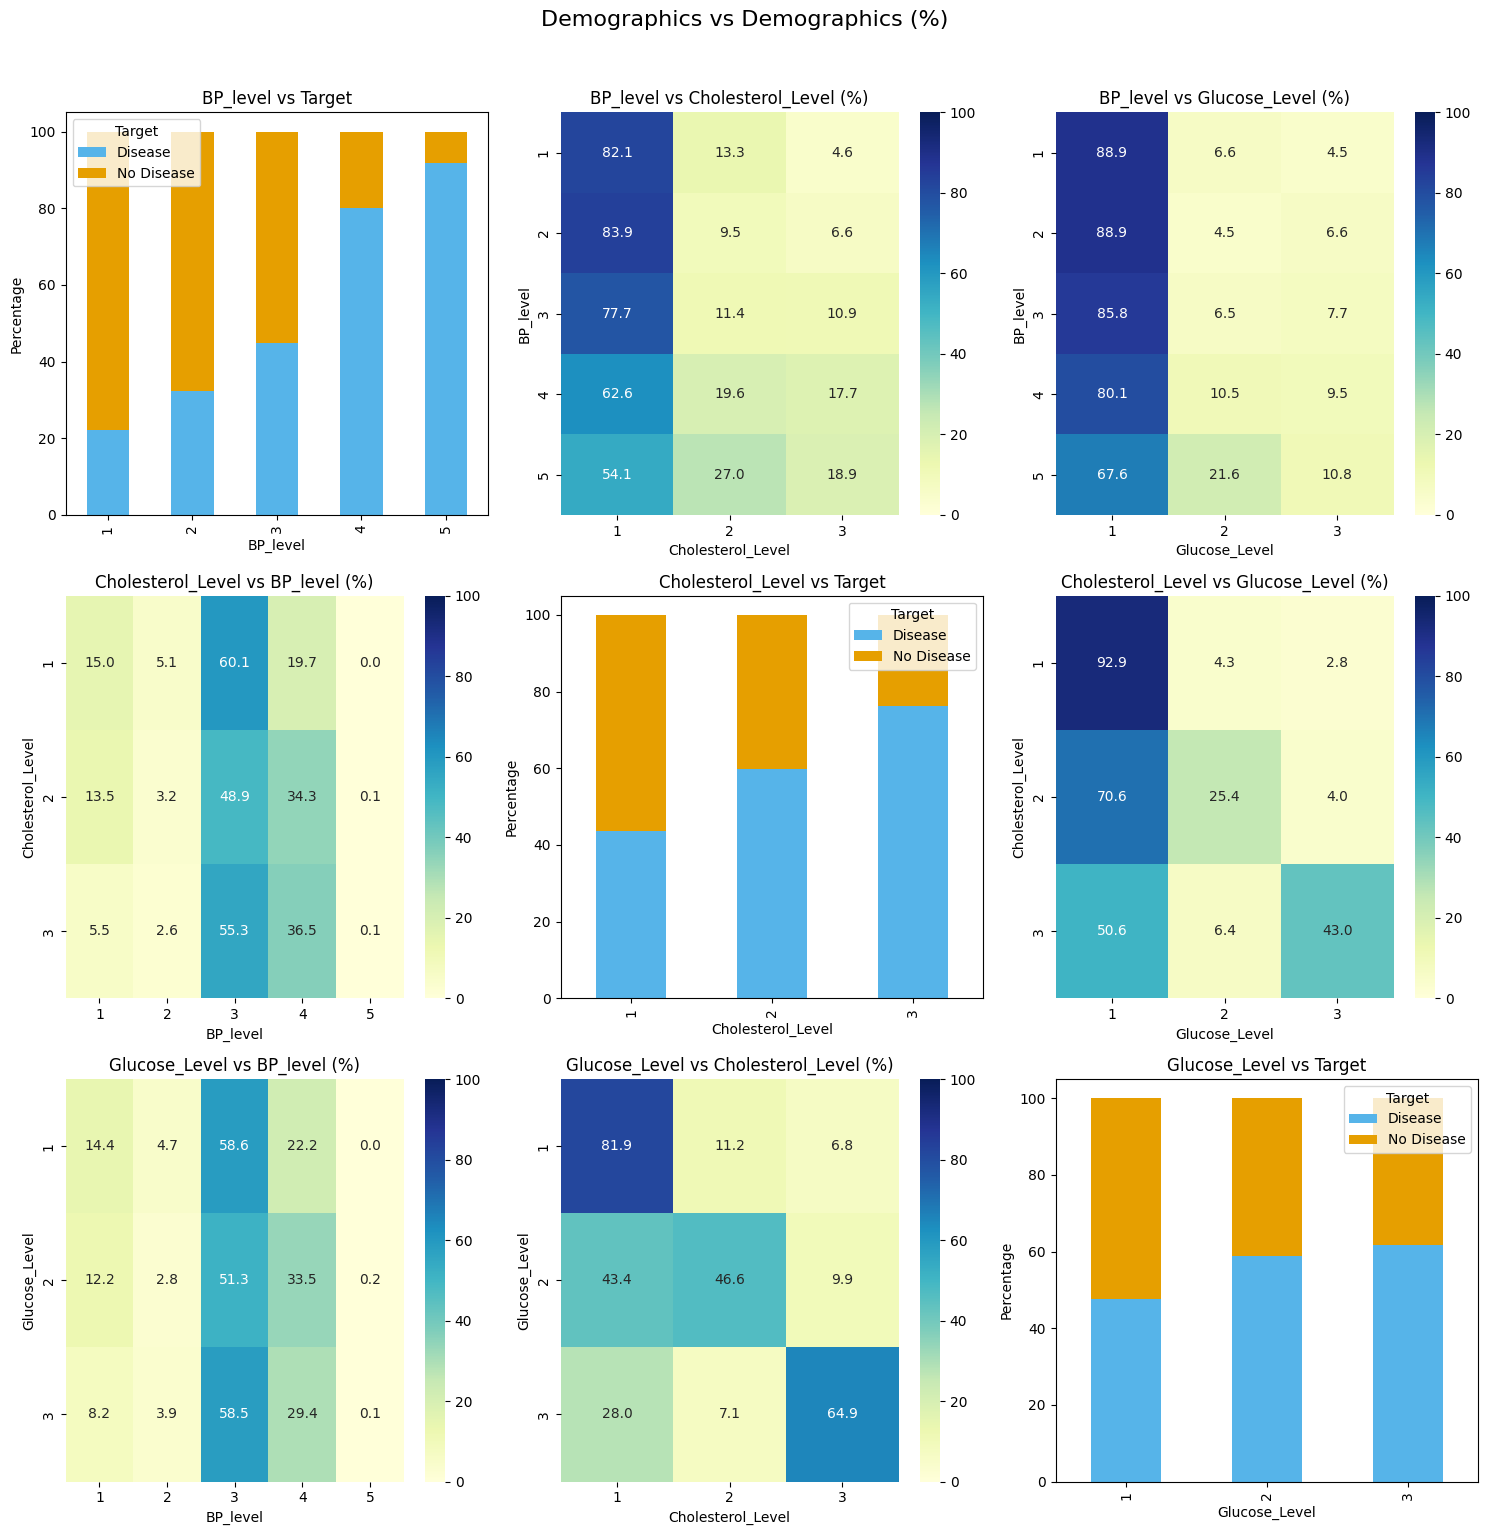

In [118]:
# Define ordered categories for BP
bp_order = [1,2,3,4,5]

# Convert BP_level to ordered categorical
df['BP_level'] = pd.Categorical(df['BP_level'], categories=bp_order, ordered=True)

# Same plotting code as yours
demo_cols = ['BP_level', 'Cholesterol_Level', 'Glucose_Level']
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

df['target_name'] = df['target'].map({0:'No Disease', 1:'Disease'})

n = len(demo_cols)
fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))

for i, col1 in enumerate(demo_cols):
    for j, col2 in enumerate(demo_cols):
        ax = axes[i,j]
        if i==j:
            # Target distribution for single demo col
            ct = pd.crosstab(df[col1], df['target_name'], normalize='index')*100
            ct = ct.reindex(bp_order) if col1 == "BP_level" else ct  # apply order only for BP_level
            ct.plot(kind='bar', stacked=True, color=[palette['No Disease'], palette['Disease']], ax=ax)
            ax.set_ylabel("Percentage")
            ax.set_xlabel(col1)
            ax.set_title(f"{col1} vs Target")
            ax.legend(title='Target')
        else:
            # Heatmap between two demo cols
            ct = pd.crosstab(df[col1], df[col2], normalize='index')*100
            if col1 == "BP_level":
                ct = ct.reindex(bp_order)   # reorder rows
            if col2 == "BP_level":
                ct = ct[ bp_order ]        # reorder columns
            sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax, vmin=0, vmax=100)
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)
            ax.set_title(f"{col1} vs {col2} (%)")

plt.suptitle("Demographics vs Demographics (%)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

df=df.drop('target_name',axis=1)

features - bp , cholesterol , glucose

-> bp vs rest
- as increase in glucose levels and cholesterol levels bp also increased and more percentage of males and females 
  are in hypertension stage 1
- as bp increses risk of developing disease also increases

-> cholesterol vs rest
- in chol 1 as sugar level increases the percentage of people are decreased and there shift from chol 2 
  as  chol values are increased sugar values are also increased
- in chol 1  the percentage of bp of  males and females are decreased and there shift from chol 2 
  as  chol values are increased bp values are also increased

-> glucose vs rest
- as glucose increase risk of developing disease also increases
- in glucose 1 as chol level increases the percentage of males and females are decreased and there shift from 
  glucose 2 as  glucose values are increases chol values are also increased
- in glucose 1 as bp level increases the percentage of males and females are decreased and there shift from 
  glucose 2 as  glucose values are increases bp values are also increased

In [119]:
# Check missing % per column
missing_pct = df.isna().mean() * 100
print("Missing % per column:\n", missing_pct)

Missing % per column:
 id                   0.0
Sex                  0.0
Weight               0.0
Systolic_BP          0.0
Diastolic_BP         0.0
Cholesterol_Level    0.0
Glucose_Level        0.0
Smoking_Status       0.0
Alcohol_Intake       0.0
Physical_Activity    0.0
target               0.0
Age_Years            0.0
Height_mt            0.0
BMI                  0.0
BP_level             0.0
Age_Group            0.0
BMI_Category         0.0
dtype: float64


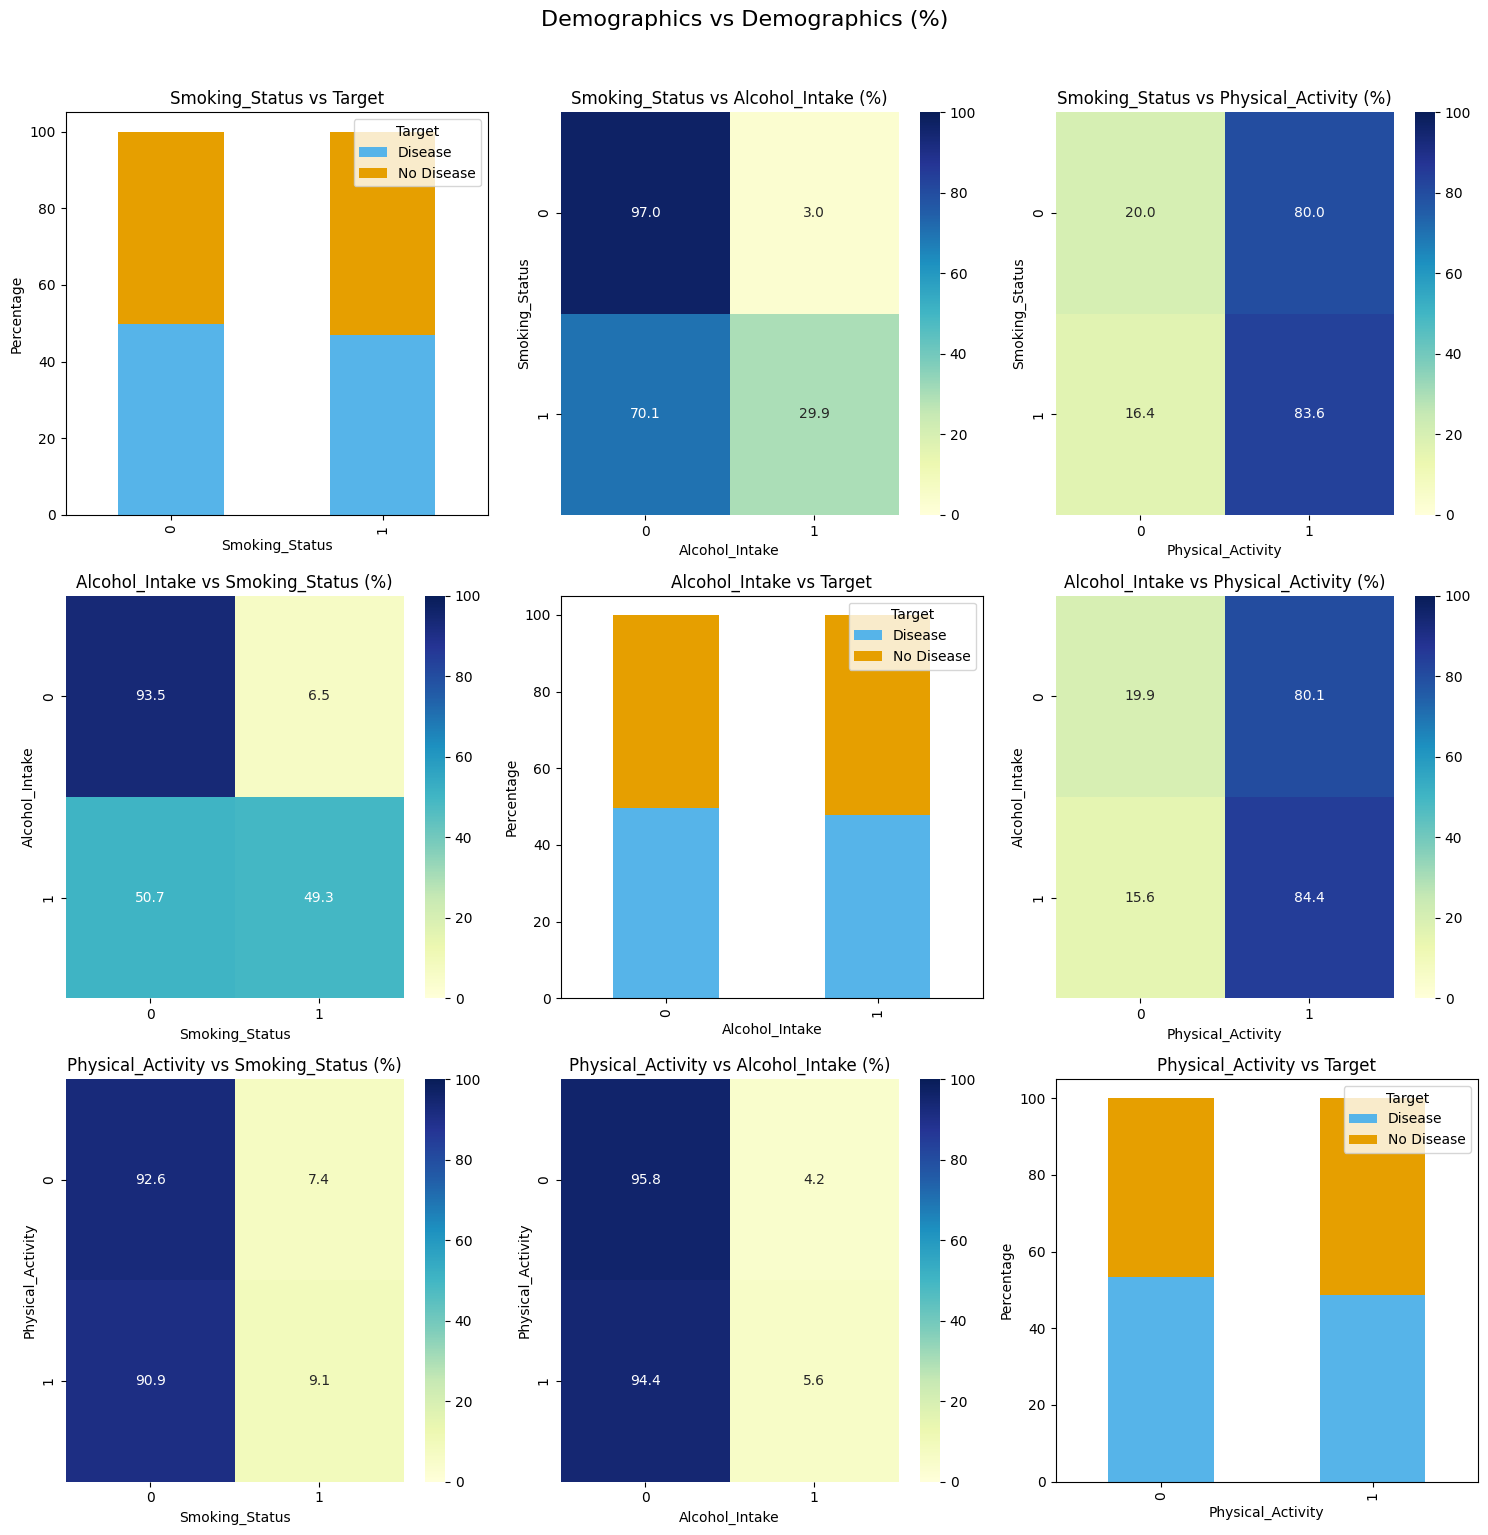

In [120]:
demo_cols = ['Smoking_Status', 'Alcohol_Intake', 'Physical_Activity']
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

# Ensure target is mapped
df['target_name'] = df['target'].map({0:'No Disease', 1:'Disease'})

#  Demo column vs Demo column (%) as heatmaps ---
n = len(demo_cols)
fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))

for i, col1 in enumerate(demo_cols):
    for j, col2 in enumerate(demo_cols):
        ax = axes[i,j]
        if i==j:
            # Show target distribution as bar plot
            ct = pd.crosstab(df[col1], df['target_name'], normalize='index')*100
            ct.plot(kind='bar', stacked=True, color=[palette['No Disease'], palette['Disease']], ax=ax)
            ax.set_ylabel("Percentage")
            ax.set_xlabel(col1)
            ax.set_title(f"{col1} vs Target")
            ax.legend(title='Target')
        else:
            # Show normalized heatmap of col1 vs col2
            ct = pd.crosstab(df[col1], df[col2], normalize='index')*100
            sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax, vmin=0, vmax=100)
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)
            ax.set_title(f"{col1} vs {col2} (%)")
plt.suptitle("Demographics vs Demographics (%)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

df=df.drop('target_name',axis=1)

observation :-
- there is huge difference in smoking status and alcohol intake . a person who smokes is 1o times more likely to consume alcohol also
- features vs target has similar or equal distribution none of it is the significant predictor of target

# multivariate analysis

In [121]:
# Create Pulse Pressure
df['Pulse_Pressure'] = df['Systolic_BP'] - df['Diastolic_BP']

# Drop unwanted columns
df = df.drop(['Weight', 'Height_mt', 'Systolic_BP', 'Diastolic_BP','Age_Group', 'BMI_Category'], axis=1)

In [122]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only original features
original_features = ["Sex","Cholesterol_Level","Glucose_Level","Smoking_Status",
                     "Alcohol_Intake","Physical_Activity","Age_Years","BMI",'Pulse_Pressure']

# Ensure X is a DataFrame and add constant
X = sm.add_constant(df[original_features])
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=["const"] + original_features)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant row
vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

             Feature       VIF
1                Sex  1.152005
2  Cholesterol_Level  1.309160
3      Glucose_Level  1.258794
4     Smoking_Status  1.247089
5     Alcohol_Intake  1.138758
6  Physical_Activity  1.001457
7          Age_Years  1.056939
8                BMI  1.082433
9     Pulse_Pressure  1.078607


Best parameters for Logistic Regression: {'scaler': 'robust', 'C': 0.0013197539668860002, 'solver': 'liblinear'}
Best parameters for XGBoost: {'scaler': 'robust', 'n_estimators': 215, 'max_depth': 4, 'learning_rate': 0.07886022356340426, 'subsample': 0.6015332929177162, 'colsample_bytree': 0.6463688355702822}


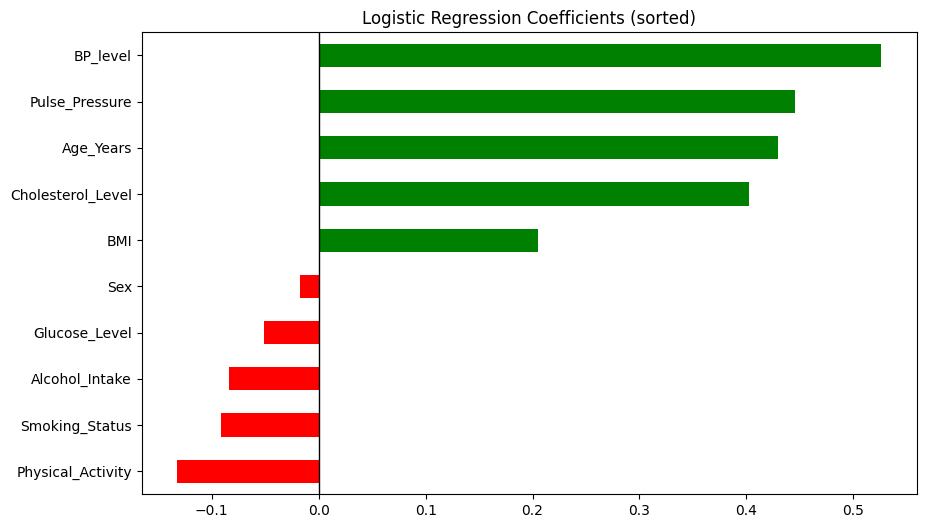

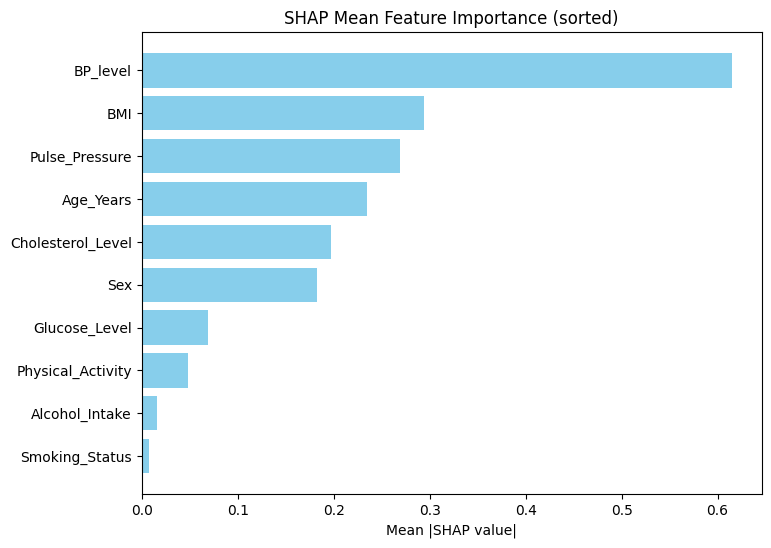

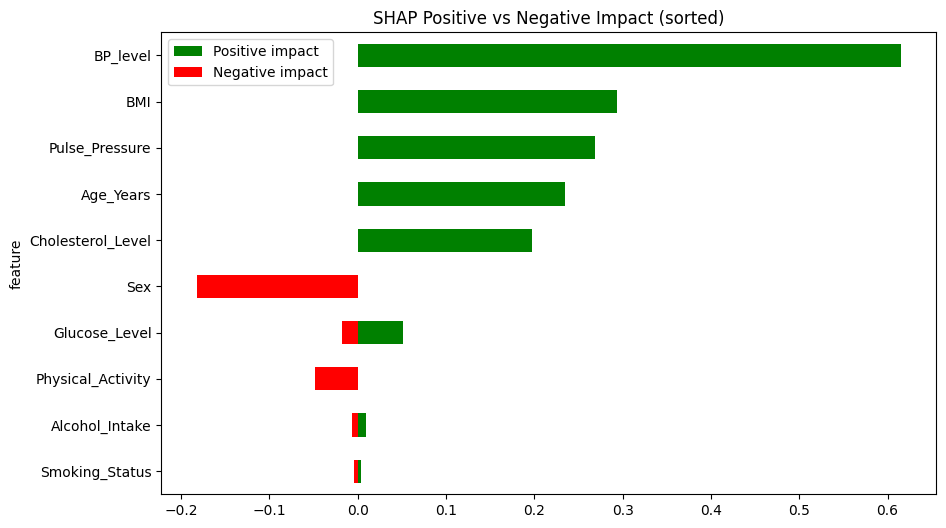

In [123]:
import optuna
import shap

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# -----------------------
# 1. Prepare dataframe
# -----------------------
cols = ['Sex','Cholesterol_Level','Glucose_Level','Smoking_Status',
        'Alcohol_Intake','Physical_Activity','Age_Years','BMI',
        'BP_level','Pulse_Pressure','target']

df = df.copy()[cols]   # ⚠️ df must exist already

ordinal_cols = ['Sex','Cholesterol_Level','Glucose_Level','Smoking_Status',
                'Alcohol_Intake','Physical_Activity','BP_level','Pulse_Pressure','Age_Years']

for c in ordinal_cols:
    if df[c].isnull().any():
        try:
            df[c] = df[c].fillna(df[c].mode()[0])
        except Exception:
            df[c] = df[c].fillna(0)

df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['target'] = df['target'].fillna(df['target'].mode()[0]).astype(int)

for c in ordinal_cols:
    df[c] = df[c].astype(int)
df['BMI'] = df['BMI'].astype(float)

features = [c for c in cols if c != 'target']
X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# -----------------------
# 2. Optuna tuning
# -----------------------
optuna.logging.set_verbosity(optuna.logging.CRITICAL)

def objective(trial, model_name, X, y):
    scaler_choice = trial.suggest_categorical("scaler", ["standard", "robust"])
    scaler = StandardScaler() if scaler_choice == "standard" else RobustScaler()
    
    if model_name == "LogisticRegression":
        C = trial.suggest_float("C", 1e-3, 10.0, log=True)
        solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
        model = LogisticRegression(
            C=C, solver=solver, class_weight='balanced',
            max_iter=1000, random_state=42
        )
    else:
        model = XGBClassifier(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            max_depth=trial.suggest_int("max_depth", 3, 8),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            subsample=trial.suggest_float("subsample", 0.6, 1.0),
            colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )
    
    pipeline = ImbPipeline([
        ('balancer', SMOTE(random_state=42)),
        ('scaler', scaler),
        ('clf', model)
    ])
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    score = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1).mean()
    return score

best_params = {}
final_pipelines = {}

for model_name in ["LogisticRegression", "XGBoost"]:
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda t: objective(t, model_name, X_train, y_train),
                   n_trials=20, n_jobs=1, show_progress_bar=False)
    best_params[model_name] = study.best_trial.params
    
    scaler = StandardScaler() if best_params[model_name].get("scaler","standard")=="standard" else RobustScaler()
    if model_name == "LogisticRegression":
        model = LogisticRegression(
            C=best_params[model_name]["C"],
            solver=best_params[model_name]["solver"],
            class_weight='balanced', max_iter=1000, random_state=42
        )
    else:
        model = XGBClassifier(
            n_estimators=best_params[model_name]["n_estimators"],
            max_depth=best_params[model_name]["max_depth"],
            learning_rate=best_params[model_name]["learning_rate"],
            subsample=best_params[model_name]["subsample"],
            colsample_bytree=best_params[model_name]["colsample_bytree"],
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )
    
    pipeline = ImbPipeline([
        ('balancer', SMOTE(random_state=42)),
        ('scaler', scaler),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    final_pipelines[model_name] = pipeline

print("Best parameters for Logistic Regression:", best_params["LogisticRegression"])
print("Best parameters for XGBoost:", best_params["XGBoost"])

# -----------------------
# 3. Visualizations (all bar plots, sorted)
# -----------------------

# --- Graph 1: Logistic Regression coefficients (sorted)
lr_model = final_pipelines["LogisticRegression"].named_steps["clf"]
coefs = pd.Series(lr_model.coef_[0], index=features)
coefs_sorted = coefs.sort_values()

plt.figure(figsize=(10,6))
coefs_sorted.plot(kind="barh", color=["green" if v>0 else "red" for v in coefs_sorted])
plt.axvline(0, color="black", linewidth=1)
plt.title("Logistic Regression Coefficients (sorted)")
plt.show()

# --- Graph 2: SHAP Mean Importance (absolute, sorted)
xgb_model = final_pipelines["XGBoost"].named_steps["clf"]
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap_importance = np.abs(shap_values).mean(axis=0)
shap_importance_df = pd.DataFrame({"feature": features, "importance": shap_importance})
shap_importance_df = shap_importance_df.sort_values("importance", ascending=True)

plt.figure(figsize=(8,6))
plt.barh(shap_importance_df["feature"], shap_importance_df["importance"], color="skyblue")
plt.title("SHAP Mean Feature Importance (sorted)")
plt.xlabel("Mean |SHAP value|")
plt.show()

# --- Graph 3: SHAP Positive vs Negative (bar, sorted)
shap_pos = np.where(shap_values > 0, shap_values, 0).mean(axis=0)
shap_neg = np.where(shap_values < 0, shap_values, 0).mean(axis=0)

shap_pos_df = pd.DataFrame({"feature": features, "value": shap_pos})
shap_neg_df = pd.DataFrame({"feature": features, "value": shap_neg})

shap_combined = pd.merge(shap_pos_df, shap_neg_df, on="feature", suffixes=("_pos", "_neg"))
shap_combined = shap_combined.set_index("feature")
# sort by total impact
shap_combined["total"] = np.abs(shap_combined["value_pos"]) + np.abs(shap_combined["value_neg"])
shap_combined = shap_combined.sort_values("total")

plt.figure(figsize=(10,6))
shap_combined["value_pos"].plot(kind="barh", color="green", label="Positive impact")
shap_combined["value_neg"].plot(kind="barh", color="red", label="Negative impact")
plt.title("SHAP Positive vs Negative Impact (sorted)")
plt.legend()
plt.show()

Random patient index: 18844


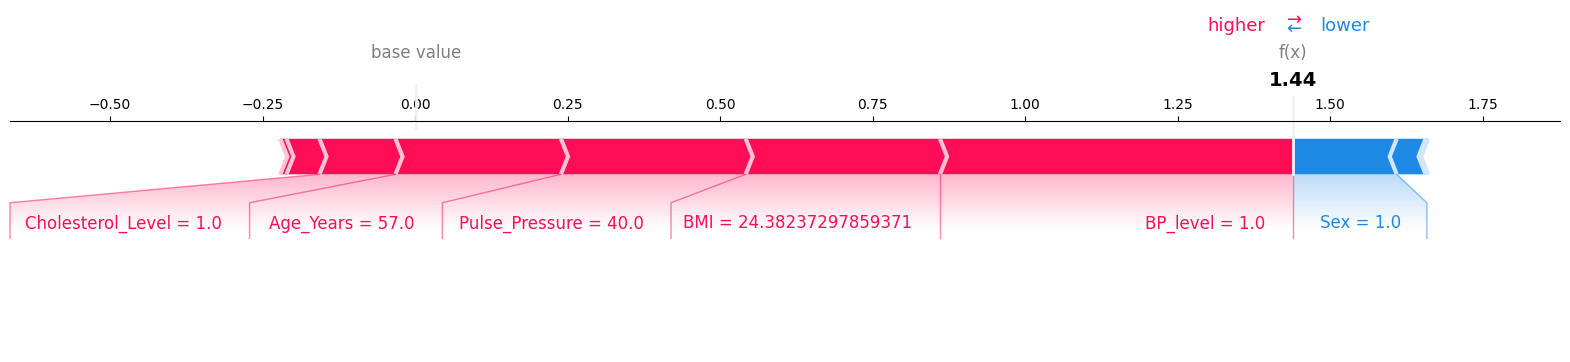

In [124]:
! pip install shap
import shap
import numpy as np
import matplotlib.pyplot as plt

# pick a random patient from X_test
idx = np.random.randint(0, X_test.shape[0])
patient_data = X_test.iloc[idx:idx+1]  # keep it as DataFrame
print("Random patient index:", idx)

# SHAP explainer for XGB (tree model explainer)
explainer = shap.TreeExplainer(xgb_model)  # use best_xgb from your tuning
shap_values = explainer.shap_values(patient_data)

# Force plot
shap.initjs()
shap.force_plot(
    explainer.expected_value,  # base value
    shap_values,               # shap values for this patient
    patient_data,              # feature values for this patient
    matplotlib=True            # render in matplotlib instead of JS
)
plt.show()


In [125]:
# Save processed data to use in model training
df.to_csv("processed_heart_disease.csv", index=False)